In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.spatial import distance
import math
from random import sample
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [2]:
taxis = pd.read_pickle("pickles/utseus-shanghai-taxi-speed-position-cleaned.pk")
noiseSurvey = pd.read_pickle("pickles/TARGET-communities-extract-wellbeing-cleaned.pkl")

In [166]:
influenceRadius = 50
influenceRadiusSq = influenceRadius ** 2 

from pyproj import CRS

mercator = CRS.from_epsg(4326)
china = CRS.from_epsg(4479)

from pyproj import Transformer

transformer = Transformer.from_crs(mercator, china, always_xy=True)

In [170]:
taxis = taxis.sample(int(len(taxis)/10))

In [162]:
noiseSurvey["transformed_longitude"] = noiseSurvey.apply(lambda x : transformer.transform(x["longitude"], x["latitude"])[0], axis = 1)
noiseSurvey["transformed_latitude"] = noiseSurvey.apply(lambda x : transformer.transform(x["longitude"], x["latitude"])[1], axis = 1)
taxis["transformed_longitude"] = taxis.apply(lambda x : transformer.transform(x["lon"], x["lat"])[0], axis = 1)
taxis["transformed_latitude"] = taxis.apply(lambda x : transformer.transform(x["lon"], x["lat"])[1], axis = 1)

In [172]:
def getDistanceSq(xP, xT, yP, yT) :
    distanceSq = (xP - xT) ** 2 + (yP - yT) ** 2
    return distanceSq

def getTaxisData(xP, yP) :
    global done
    global total
    nTaxis = 0
    averageDistance = 0 
    averageSpeed = 0 
    nZeroSpeed = 0
    
    for index, taxi in taxis.iterrows() :
        if ((abs(taxi["transformed_longitude"] - xP) > influenceRadius) | (abs(taxi["transformed_latitude"] - yP) > influenceRadius)): 
            continue
        distanceSq = getDistanceSq(xP, taxi["transformed_longitude"], yP, taxi["transformed_latitude"]) 
        if (distanceSq <= influenceRadiusSq) :
            nTaxis += 1 
            dist = math.sqrt(distanceSq)
            averageDistance += dist
            averageSpeed += taxi["speed"]
            if (taxi["speed"] == 0) :
                nZeroSpeed += 1
    if (nTaxis > 0) :
        averageDistance /= nTaxis
    if ((nTaxis - averageSpeed) > 0) :
        averageSpeed /= (nTaxis - nZeroSpeed)
        
    print(done,"/",total," done")
    done+=1 
    
    return nTaxis, averageDistance, averageSpeed
            

In [164]:
len(noiseSurvey)

420

In [173]:
done = 1
total = len(noiseSurvey)
noiseSurvey["result"] = noiseSurvey.apply(lambda row : getTaxisData(row["transformed_longitude"], row["transformed_latitude"]), axis = 1)
#noiseSurvey["meanTaxisDistance"] = noiseSurvey.apply(lambda row : getTaxisData(row["transformed_longitude"], row["transformed_latitude"])[1], axis = 1)
#noiseSurvey["meanTaxisSpeed"] = noiseSurvey.apply(lambda row : getTaxisData(row["transformed_longitude"], row["transformed_latitude"])[2], axis = 1)

1 / 420  done
2 / 420  done
3 / 420  done
4 / 420  done
5 / 420  done
6 / 420  done
7 / 420  done
8 / 420  done
9 / 420  done
10 / 420  done
11 / 420  done
12 / 420  done
13 / 420  done
14 / 420  done
15 / 420  done
16 / 420  done
17 / 420  done
18 / 420  done
19 / 420  done
20 / 420  done
21 / 420  done
22 / 420  done
23 / 420  done
24 / 420  done
25 / 420  done
26 / 420  done
27 / 420  done
28 / 420  done
29 / 420  done
30 / 420  done
31 / 420  done
32 / 420  done
33 / 420  done
34 / 420  done
35 / 420  done
36 / 420  done
37 / 420  done
38 / 420  done
39 / 420  done
40 / 420  done
41 / 420  done
42 / 420  done
43 / 420  done
44 / 420  done
45 / 420  done
46 / 420  done
47 / 420  done
48 / 420  done
49 / 420  done
50 / 420  done
51 / 420  done
52 / 420  done
53 / 420  done
54 / 420  done
55 / 420  done
56 / 420  done
57 / 420  done
58 / 420  done
59 / 420  done
60 / 420  done
61 / 420  done
62 / 420  done
63 / 420  done
64 / 420  done
65 / 420  done
66 / 420  done
67 / 420  done
68 /

In [178]:
noiseSurvey["nearTaxisAmount"] = noiseSurvey.apply(lambda row : row.result[0], axis = 1)
noiseSurvey["meanTaxisDistance"] = noiseSurvey.apply(lambda row : row.result[1], axis = 1)
noiseSurvey["meanTaxisSpeed"] = noiseSurvey.apply(lambda row : row.result[2], axis = 1)
noiseSurvey.head()

,noise,longitude,latitude,district,town,transformed_longitude,transformed_latitude,result,nearTaxisAmount,meanTaxisDistance,meanTaxisSpeed
1,0.0,121.104287,31.155882,青浦区,盈浦街道,-2.822208e+06,4.677636e+06,"(0, 0, 0)",0,0.00000,0.0
2,0.0,121.351529,31.144327,闵行区,七宝镇,-2.842711e+06,4.665980e+06,"(1, 36.83621954436523, 12.9)",1,36.83622,12.9
3,0.0,121.468520,31.042285,闵行区,吴泾镇,-2.855282e+06,4.665149e+06,"(0, 0, 0)",0,0.00000,0.0
4,0.0,121.367237,31.240725,普陀区,长征镇,-2.841109e+06,4.660474e+06,"(0, 0, 0)",0,0.00000,0.0
5,0.0,121.403601,31.269155,普陀区,万里街道,-2.843214e+06,4.657274e+06,"(0, 0, 0)",0,0.00000,0.0


In [189]:
%matplotlib inline
plt.boxplot(noiseSurvey[["nearTaxisAmount"]])

In [420]:
#df = pd.read_pickle("pickles/TARGET-communities-extract-wellbeing-cleaned.pkl")

savedDf = noiseSurvey[["district", "town", "nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed", "noise", "longitude", "latitude"]]

savedDf.head()

,district,town,nearTaxisAmount,meanTaxisDistance,meanTaxisSpeed,noise,longitude,latitude
1,青浦区,盈浦街道,0,0.00000,0.0,0.0,121.104287,31.155882
2,闵行区,七宝镇,1,36.83622,12.9,0.0,121.351529,31.144327
3,闵行区,吴泾镇,0,0.00000,0.0,0.0,121.468520,31.042285
4,普陀区,长征镇,0,0.00000,0.0,0.0,121.367237,31.240725
5,普陀区,万里街道,0,0.00000,0.0,0.0,121.403601,31.269155


In [421]:
savedDf.to_pickle("pickles/TARGET-communities-extract-wellbeing-with-taxis.pkl")

In [309]:
quietRoads = pd.read_pickle("pickles/utseus-quiet-roads-cleaned.pk")
quietRoads.head()

,quietness,distance,geometry
12,0.441669,68.359344,"LINESTRING (121.47242 31.22315, 121.47226 31.2..."
13,-0.535838,178.448013,"LINESTRING (121.47226 31.22375, 121.47253 31.2..."
14,-0.015765,60.692032,"LINESTRING (121.47162 31.22376, 121.47176 31.2..."
15,-0.981896,9515.562500,"LINESTRING (121.10299 31.43277, 121.11661 31.4..."
16,-0.140280,97.197342,"LINESTRING (121.16872 31.36934, 121.16868 31.3..."


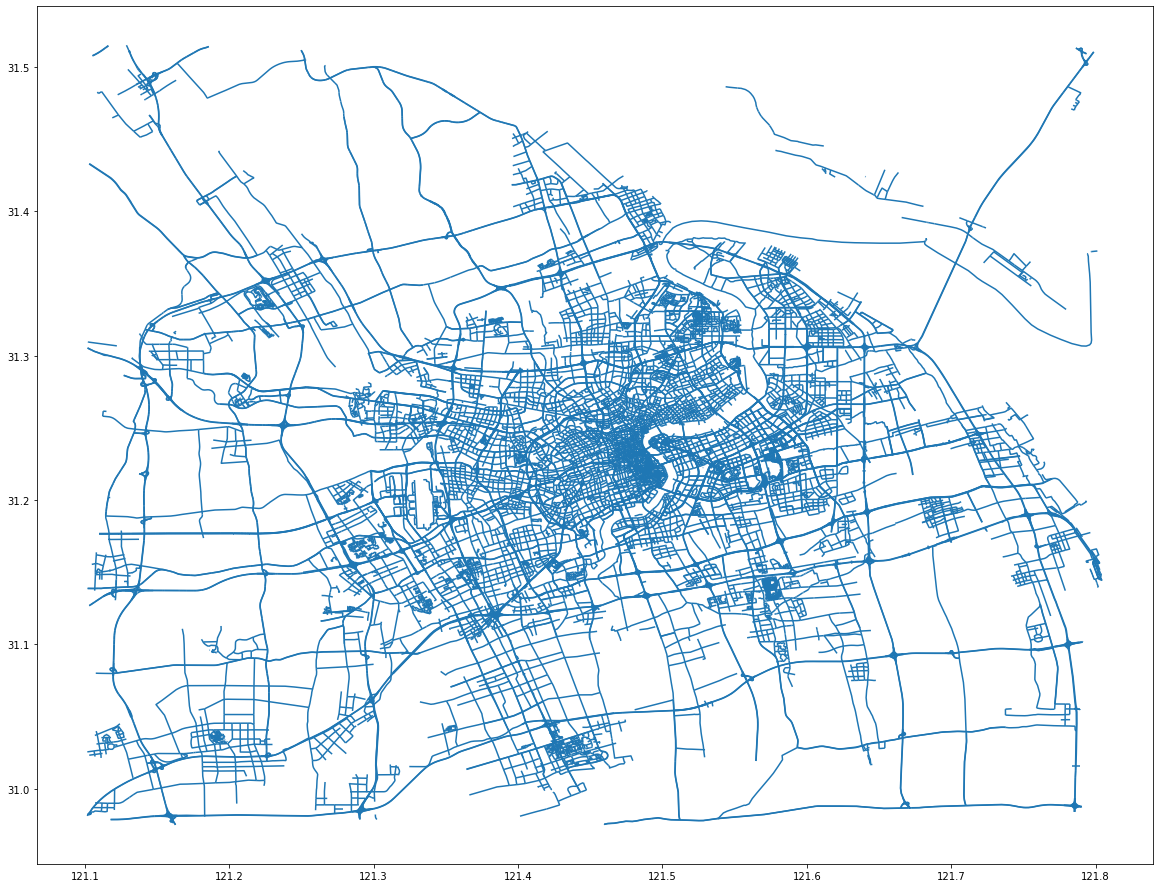

In [351]:
quietRoads.geometry.plot(figsize=(20,20))

In [317]:
def getQuietness(xP, yP) :
    global done
    global total
    nTaxis = 0
    averageDistance = 0 
    averageSpeed = 0 
    nZeroSpeed = 0
    
    for index, taxi in taxis.iterrows() :
        if ((abs(taxi["transformed_longitude"] - xP) > influenceRadius) | (abs(taxi["transformed_latitude"] - yP) > influenceRadius)): 
            continue
        distanceSq = getDistanceSq(xP, taxi["transformed_longitude"], yP, taxi["transformed_latitude"]) 
        if (distanceSq <= influenceRadiusSq) :
            nTaxis += 1 
            dist = math.sqrt(distanceSq)
            averageDistance += dist
            averageSpeed += taxi["speed"]
            if (taxi["speed"] == 0) :
                nZeroSpeed += 1
    if (nTaxis > 0) :
        averageDistance /= nTaxis
    if ((nTaxis - averageSpeed) > 0) :
        averageSpeed /= (nTaxis - nZeroSpeed)
        
    print(done,"/",total," done")
    done+=1 
    
    return nTaxis, averageDistance, averageSpeed

In [328]:
quietRoads.geometry.values[0].contains(pt)

False

AttributeError: 'LineCollection' object has no property 'column'

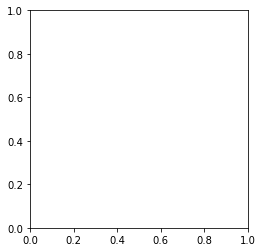

In [326]:
quietRoads.geometry.plot(column="quietness")

In [436]:
mobikes = pd.read_pickle("pickles/utseus-mobike-2016-cleaned.pk")

In [439]:
mobikes = mobikes.sample(int(len(mobikes)/10))
mobikes.head()

,start_location_x,start_location_y,end_location_x,end_location_y
927844,121.425,31.165,121.430,31.156
756864,121.404,31.276,121.405,31.279
601688,121.406,31.172,121.427,31.180
816719,121.492,31.263,121.495,31.282
538652,121.513,31.195,121.509,31.191


In [440]:
noiseSurvey["transformed_longitude"] = noiseSurvey.apply(lambda x : transformer.transform(x["longitude"], x["latitude"])[0], axis = 1)
noiseSurvey["transformed_latitude"] = noiseSurvey.apply(lambda x : transformer.transform(x["longitude"], x["latitude"])[1], axis = 1)
mobikes["new_start_x"] = mobikes.apply(lambda x : transformer.transform(x["start_location_x"], x["start_location_y"])[0], axis = 1)
mobikes["new_start_y"] = mobikes.apply(lambda x : transformer.transform(x["start_location_x"], x["start_location_y"])[1], axis = 1)
mobikes["new_end_x"] = mobikes.apply(lambda x : transformer.transform(x["end_location_x"], x["end_location_y"])[0], axis = 1)
mobikes["new_end_y"] = mobikes.apply(lambda x : transformer.transform(x["end_location_x"], x["end_location_y"])[1], axis = 1)

In [442]:
def getDistanceSq(xP, xT, yP, yT) :
    distanceSq = (xP - xT) ** 2 + (yP - yT) ** 2
    return distanceSq

def getMobikesData(xP, yP) :
    global done
    global total
    nMobike = 0
    
    for index, mobike in mobikes.iterrows() :
        
        xM = mobike["new_start_x"]
        yM = mobike["new_start_y"]
        if (not ((abs(xM - xP) > influenceRadius) | (abs(yM - yP) > influenceRadius))) : 
            distanceSq = getDistanceSq(xP, xM, yP, yM) 
            if (distanceSq <= influenceRadiusSq) :
                nMobike += 1  
            else :
                xM = mobike["new_end_x"]
                yM = mobike["new_end_y"]
                if (not ((abs(xM - xP) > influenceRadius) | (abs(yM - yP) > influenceRadius))) : 
                    distanceSq = getDistanceSq(xP, xM, yP, yM) 
                    if (distanceSq <= influenceRadiusSq) :
                        nMobike += 1 
        else :
            xM = mobike["new_end_x"]
            yM = mobike["new_end_y"]
            if (not ((abs(xM - xP) > influenceRadius) | (abs(yM - yP) > influenceRadius))) : 
                distanceSq = getDistanceSq(xP, xM, yP, yM) 
                if (distanceSq <= influenceRadiusSq) :
                    nMobike += 1 
        
    print(done,"/",total," done")
    done+=1 
    
    return nMobike
            

In [443]:
len(noiseSurvey)

420

In [445]:
done = 1
total = len(noiseSurvey)
noiseSurvey["nearMobikes"] = noiseSurvey.apply(lambda row : getMobikesData(row["transformed_longitude"], row["transformed_latitude"]), axis = 1)
#noiseSurvey["meanTaxisDistance"] = noiseSurvey.apply(lambda row : getTaxisData(row["transformed_longitude"], row["transformed_latitude"])[1], axis = 1)
#noiseSurvey["meanTaxisSpeed"] = noiseSurvey.apply(lambda row : getTaxisData(row["transformed_longitude"], row["transformed_latitude"])[2], axis = 1)

1 / 420  done
2 / 420  done
3 / 420  done
4 / 420  done
5 / 420  done
6 / 420  done
7 / 420  done
8 / 420  done
9 / 420  done
10 / 420  done
11 / 420  done
12 / 420  done
13 / 420  done
14 / 420  done
15 / 420  done
16 / 420  done
17 / 420  done
18 / 420  done
19 / 420  done
20 / 420  done
21 / 420  done
22 / 420  done
23 / 420  done
24 / 420  done
25 / 420  done
26 / 420  done
27 / 420  done
28 / 420  done
29 / 420  done
30 / 420  done
31 / 420  done
32 / 420  done
33 / 420  done
34 / 420  done
35 / 420  done
36 / 420  done
37 / 420  done
38 / 420  done
39 / 420  done
40 / 420  done
41 / 420  done
42 / 420  done
43 / 420  done
44 / 420  done
45 / 420  done
46 / 420  done
47 / 420  done
48 / 420  done
49 / 420  done
50 / 420  done
51 / 420  done
52 / 420  done
53 / 420  done
54 / 420  done
55 / 420  done
56 / 420  done
57 / 420  done
58 / 420  done
59 / 420  done
60 / 420  done
61 / 420  done
62 / 420  done
63 / 420  done
64 / 420  done
65 / 420  done
66 / 420  done
67 / 420  done
68 /

In [446]:
#df = pd.read_pickle("pickles/TARGET-communities-extract-wellbeing-cleaned.pkl")

savedDf = noiseSurvey[["district", "town", "nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed", "noise", "longitude", "latitude", "nearMobikes"]]

savedDf.head()

,district,town,nearTaxisAmount,meanTaxisDistance,meanTaxisSpeed,noise,longitude,latitude,nearMobikes
1,青浦区,盈浦街道,0,0.00000,0.0,0.0,121.104287,31.155882,0
2,闵行区,七宝镇,1,36.83622,12.9,0.0,121.351529,31.144327,0
3,闵行区,吴泾镇,0,0.00000,0.0,0.0,121.468520,31.042285,0
4,普陀区,长征镇,0,0.00000,0.0,0.0,121.367237,31.240725,9
5,普陀区,万里街道,0,0.00000,0.0,0.0,121.403601,31.269155,1


In [449]:
savedDf.to_pickle("pickles/TARGET-communities-extract-wellbeing-with-taxis.pkl")

,quietness,distance,geometry
12,0.441669,68.359344,"LINESTRING (121.47242 31.22315, 121.47226 31.2..."
13,-0.535838,178.448013,"LINESTRING (121.47226 31.22375, 121.47253 31.2..."
14,-0.015765,60.692032,"LINESTRING (121.47162 31.22376, 121.47176 31.2..."
15,-0.981896,9515.562500,"LINESTRING (121.10299 31.43277, 121.11661 31.4..."
16,-0.140280,97.197342,"LINESTRING (121.16872 31.36934, 121.16868 31.3..."


# Machine learning algorithm

## 0. Common Part

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [450]:
df = pd.read_pickle("pickles/TARGET-communities-extract-wellbeing-with-taxis.pkl")

## 1. Decision Tree (Minimal)

In [195]:
from sklearn import tree

In [451]:
X = df[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed", "nearMobikes"]]
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20, random_state = 666)

paramGrid = {"max_depth" : [3,5,10,20,25,50], "criterion" : ["gini", "entropy"]}
search = GridSearchCV(tree.DecisionTreeClassifier(),paramGrid, cv=ShuffleSplit(n_splits = 5))
search.fit(xTrain,yTrain)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_j

In [452]:
search.best_score_

0.8

In [ ]:
search.best_params_

In [ ]:
search.best_estimator_

In [294]:
clf = tree.DecisionTreeClassifier(max_depth=3, criterion="gini")
clf = clf.fit(xTrain, yTrain)

[Text(755.625, 475.65000000000003, 'X[0] <= 0.06\ngini = 0.297\nsamples = 336\nvalue = [275, 61]'),
 Text(465.0, 339.75, 'X[2] <= 0.029\ngini = 0.319\nsamples = 296\nvalue = [237, 59]'),
 Text(232.5, 203.85000000000002, 'X[1] <= 0.419\ngini = 0.304\nsamples = 284\nvalue = [231, 53]'),
 Text(116.25, 67.94999999999999, 'gini = 0.312\nsamples = 258\nvalue = [208, 50]'),
 Text(348.75, 67.94999999999999, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(697.5, 203.85000000000002, 'X[2] <= 0.039\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(581.25, 67.94999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(813.75, 67.94999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(1046.25, 339.75, 'X[0] <= 0.22\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(930.0, 203.85000000000002, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(1162.5, 203.85000000000002, 'X[1] <= 0.676\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(1046.25, 67.94999999999999, 'gini =

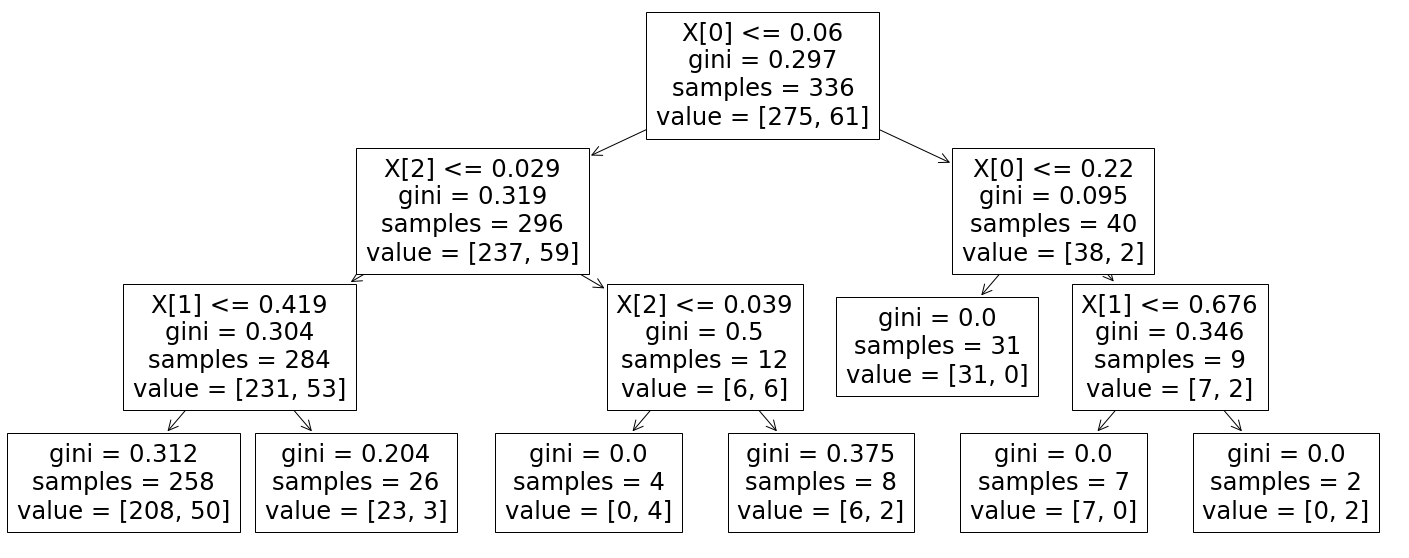

In [295]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf)

In [296]:
trueProp = 0
total = 0
for i in yTrain :
    if i :
        trueProp += 1
    total += 1
    
trueProp/total

0.18154761904761904

## 2. Decision Tree (Minimal + District)

In [207]:
from sklearn import tree

In [277]:
X = df[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed", "district", "town"]]
Y = df[["noise"]]
Y = (Y.noise == 1.0)
X[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]] = MinMaxScaler().fit_transform(X[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]])

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.20, random_state = 666)

paramGrid = {"max_depth" : [3,5,10,20,25,50], "criterion" : ["gini", "entropy"]}
search = GridSearchCV(tree.DecisionTreeClassifier(),paramGrid, cv=ShuffleSplit(n_splits = 5))
search.fit(X,Y)

<ipython-input-277-c66d10fecdba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]] = MinMaxScaler().fit_transform(X[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]])
/usr/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test par

ValueError: could not convert string to float: '青浦区'

In [ ]:
search.best_score_

In [ ]:
search.best_params_

In [ ]:
search.best_estimator_

## 3. Random Forest Classifier

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [497]:
X = df[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]]
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20, random_state = 666)

paramGrid = {"max_depth" : [3,5,10,20,25,50], "n_estimators" : [2, 5, 10, 25, 50] , "criterion" : ["gini", "entropy"]}
search = GridSearchCV(RandomForestClassifier(random_state = 666),paramGrid, cv=ShuffleSplit(n_splits = 5))
search.fit(xTrain, yTrain)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                          

In [498]:
search.best_score_

0.8352941176470589

In [ ]:
search.best_params_

In [ ]:
search.best_estimator_

## 4. Decision Tree (Minimal)

In [195]:
from sklearn import tree

In [491]:
X = df[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]]
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20, random_state = 666)

paramGrid = {"max_depth" : [3,5,10,20,25,50], "criterion" : ["gini", "entropy"]}
search = GridSearchCV(tree.DecisionTreeClassifier(),paramGrid, cv=ShuffleSplit(n_splits = 5))
search.fit(xTrain,yTrain)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_j

In [492]:
search.best_score_

0.8647058823529411

In [ ]:
search.best_params_

In [293]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [294]:
clf = tree.DecisionTreeClassifier(max_depth=3, criterion="gini")
clf = clf.fit(xTrain, yTrain)

[Text(755.625, 475.65000000000003, 'X[0] <= 0.06\ngini = 0.297\nsamples = 336\nvalue = [275, 61]'),
 Text(465.0, 339.75, 'X[2] <= 0.029\ngini = 0.319\nsamples = 296\nvalue = [237, 59]'),
 Text(232.5, 203.85000000000002, 'X[1] <= 0.419\ngini = 0.304\nsamples = 284\nvalue = [231, 53]'),
 Text(116.25, 67.94999999999999, 'gini = 0.312\nsamples = 258\nvalue = [208, 50]'),
 Text(348.75, 67.94999999999999, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(697.5, 203.85000000000002, 'X[2] <= 0.039\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(581.25, 67.94999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(813.75, 67.94999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(1046.25, 339.75, 'X[0] <= 0.22\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(930.0, 203.85000000000002, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(1162.5, 203.85000000000002, 'X[1] <= 0.676\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(1046.25, 67.94999999999999, 'gini =

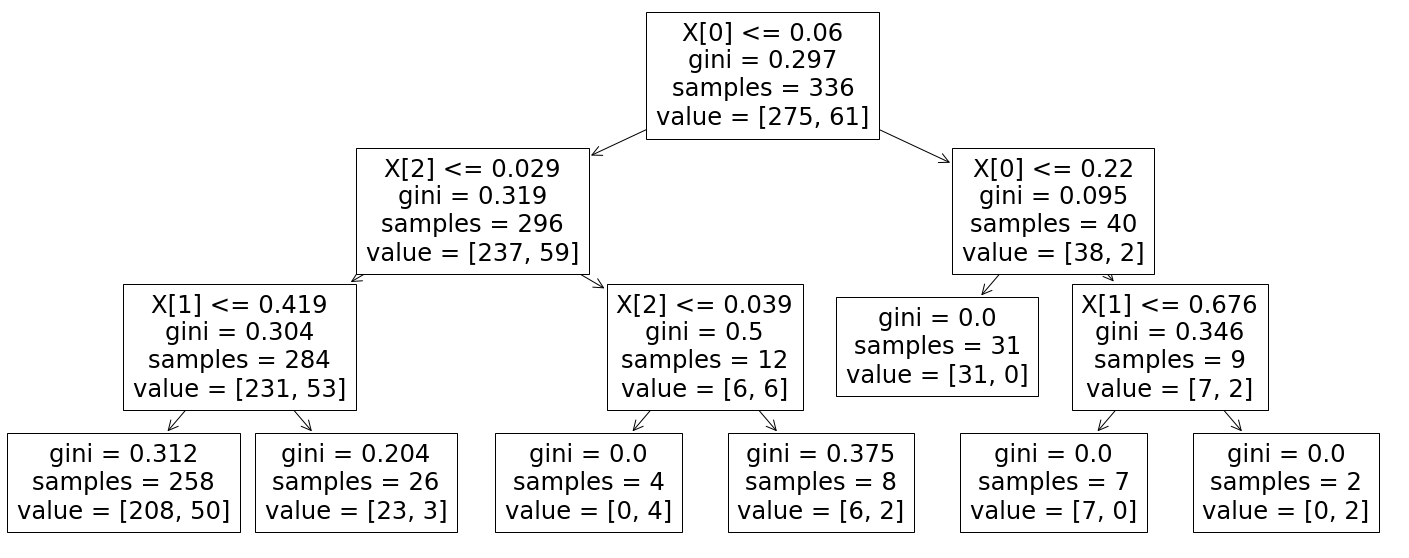

In [295]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf)

In [296]:
trueProp = 0
total = 0
for i in yTrain :
    if i :
        trueProp += 1
    total += 1
    
trueProp/total

## 5. Support Vector Machine  

In [475]:
X = df[["nearTaxisAmount", "meanTaxisDistance", "meanTaxisSpeed"]]
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20, random_state = 666)

from sklearn.svm import SVC
paramGrid = {"C" : [0.1, 1, 10, 100], 'decision_function_shape' : ['ovr', 'ovo'], "kernel" : ["linear", "rbf", "sigmoid"]}
search = GridSearchCV(SVC(),paramGrid, cv=ShuffleSplit(n_splits = 5))
search.fit(xTrain,yTrain)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [476]:
search.best_score_

0.8470588235294118

In [339]:
search.best_params_

{'C': 100, 'decision_function_shape': 'ovr', 'kernel': 'rbf'}

In [332]:
search.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 6. Nearest Neighbors  

In [473]:
X = df[["nearTaxisAmount", "meanTaxisSpeed", "latitude", "longitude"]] # .apply(lambda row : [row["nearTaxisAmount"], row["meanTaxisSpeed"]], axis = 1)
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20, random_state = 666)

from sklearn.neighbors import KNeighborsClassifier
paramGrid = {"n_neighbors" : [1, 2, 5, 10, 20, 25]}
search = GridSearchCV(KNeighborsClassifier(),paramGrid, cv=ShuffleSplit(n_splits = 5))
search.fit(xTrain,yTrain)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 5, 10, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [474]:
search.best_score_

0.8176470588235294

In [364]:
search.best_params_

{'n_neighbors': 2}

In [332]:
search.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [352]:
df

,district,town,nearTaxisAmount,meanTaxisDistance,meanTaxisSpeed,noise
1,青浦区,盈浦街道,0,0.000000,0.0,0.0
2,闵行区,七宝镇,1,36.836220,12.9,0.0
3,闵行区,吴泾镇,0,0.000000,0.0,0.0
4,普陀区,长征镇,0,0.000000,0.0,0.0
5,普陀区,万里街道,0,0.000000,0.0,0.0
...,...,...,...,...,...,...
463,松江区,方松街道,0,0.000000,0.0,1.0
464,浦东新区,周家渡街道,0,0.000000,0.0,1.0
465,闵行区,虹桥镇,1,45.835495,34.9,1.0
466,青浦区,徐泾镇,0,0.000000,0.0,1.0


## 7. Nearest Neighbors (Pipe)

In [501]:
X = df[["nearTaxisAmount", "meanTaxisSpeed", "meanTaxisDistance"]] # .apply(lambda row : [row["nearTaxisAmount"], row["meanTaxisSpeed"]], axis = 1)
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20)
xTrain, xValidate, yTrain, yValidate = train_test_split(xTrain, yTrain, test_size = 0.20)

from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#paramGrid = {"n_neighbors" : [1, 2, 5, 10, 20, 25]}
search = Pipeline([('nca', NeighborhoodComponentsAnalysis()), ('knn', KNeighborsClassifier(n_neighbors = 2))])
search.fit(xTrain,yTrain)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=None, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

In [502]:
search.score(xValidate, yValidate)

0.8823529411764706

In [364]:
search.best_params_

{'n_neighbors': 2}

In [332]:
search.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [352]:
df

,district,town,nearTaxisAmount,meanTaxisDistance,meanTaxisSpeed,noise
1,青浦区,盈浦街道,0,0.000000,0.0,0.0
2,闵行区,七宝镇,1,36.836220,12.9,0.0
3,闵行区,吴泾镇,0,0.000000,0.0,0.0
4,普陀区,长征镇,0,0.000000,0.0,0.0
5,普陀区,万里街道,0,0.000000,0.0,0.0
...,...,...,...,...,...,...
463,松江区,方松街道,0,0.000000,0.0,1.0
464,浦东新区,周家渡街道,0,0.000000,0.0,1.0
465,闵行区,虹桥镇,1,45.835495,34.9,1.0
466,青浦区,徐泾镇,0,0.000000,0.0,1.0


## 8. AdaBoost  

In [467]:
X = df[["nearTaxisAmount", "meanTaxisSpeed", "latitude", "longitude"]] # .apply(lambda row : [row["nearTaxisAmount"], row["meanTaxisSpeed"]], axis = 1)
Y = df[["noise"]]
Y = (Y.noise == "1.0")
Xrescaled = MinMaxScaler().fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(Xrescaled, Y, test_size = 0.20)
xTrain, xValidate, yTrain, yValidate = train_test_split(xTrain, yTrain, test_size = 0.20)

from sklearn.ensemble import GradientBoostingClassifier
#paramGrid = {"n_estimators" : [1, 2, 5, 10, 20, 25, 50, 100, 150], "learning_rate" : [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0],"max_depth" : [1, 2, 3, 5, 10, 25]}
search = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
search.fit(xTrain,yTrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [468]:
search.score(xValidate, yValidate)

0.8088235294117647

In [405]:
search.best_params_

{'n_estimators': 25}

In [332]:
search.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [504]:
test.accuracy.get()

1000000 %


,noise,longitude,latitude,district,town
1,0.0,121.104287,31.155882,青浦区,盈浦街道
2,0.0,121.351529,31.144327,闵行区,七宝镇
3,0.0,121.468520,31.042285,闵行区,吴泾镇
4,0.0,121.367237,31.240725,普陀区,长征镇
5,0.0,121.403601,31.269155,普陀区,万里街道
...,...,...,...,...,...
463,1.0,121.228429,31.032814,松江区,方松街道
464,1.0,121.511665,31.183639,浦东新区,周家渡街道
465,1.0,121.362468,31.180505,闵行区,虹桥镇
466,1.0,121.272024,31.171085,青浦区,徐泾镇
